## Imports

In [1]:
import matplotlib.pyplot as plt
import sys
import os 
import warnings
import numpy as np

pkg_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(pkg_path)

np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
warnings.filterwarnings(action='ignore', category=UserWarning)

import shtmbss2.addsrc
# from shtmbss2.common.config import RuntimeConfig, Backends
from shtmbss2.common.config import *
from shtmbss2.core.logging import log

In [2]:
RuntimeConfig.backend = Backends.NEST
RuntimeConfig.plasticity_location = PlasticityLocation.OFF_CHIP

In [3]:
if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    import shtmbss2.brainscales2.patches
    from shtmbss2.brainscales2.network import SHTMTotal
    from shtmbss2.brainscales2.hardware import hardware_initialization
    # hardware_initialization()
elif RuntimeConfig.backend == Backends.NEST:
    from shtmbss2.nest.network import SHTMTotal

from shtmbss2.common.network import NeuronType, RecTypes
from shtmbss2.common.executor import ParallelExecutor
from shtmbss2.core.performance import PerformanceMulti
from shtmbss2.core.parameters import NetworkParameters, PlottingParameters
from shtmbss2.core.data import get_experiment_folder    


Jun 28 14:47:58 Install [Info]: 
    loaded module PyNN extensions for NEST


## Config

In [4]:
seed_offset = 0
num_instances = 5
num_steps = 100
# experiment_id = 'bss2-onchip_w-diw_s1'
experiment_id = 'org_s1'
experiment_num = 2

load_params = False
p_experiment_type = ExperimentType.OPT_GRID_MULTI
p_experiment_id = 'bss2-lambda'
p_experiment_num = 1
p_experiment_subnum = 1229

# pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)
# log.handlers[LogHandler.FILE].setLevel(logging.DEBUG)

## Simulation

In [ ]:
if load_params:
    p = NetworkParameters(network_type=SHTMTotal)
    p.load_experiment_params(experiment_type=ExperimentType.EVAL_MULTI, experiment_id=experiment_id, experiment_num=experiment_num)
else:
    p = None

In [ ]:
pe = ParallelExecutor(num_instances=num_instances, experiment_id=experiment_id, fig_save=True)

experiment_num = pe.run(steps=num_steps, p=p, seed_offset=seed_offset, parallel=False)

In [ ]:
import csv

p = NetworkParameters(network_type=SHTMTotal)
p.load_experiment_params(experiment_type=ExperimentType.EVAL_MULTI, experiment_id=experiment_id, experiment_num=experiment_num)

pf = PerformanceMulti(p, num_instances)
pf.load_data(SHTMTotal, experiment_type=ExperimentType.EVAL_MULTI, experiment_id=experiment_id, experiment_num=experiment_num)

pf_dict = pf.get_performance_dict(final_result=True, running_avgs=p.performance.running_avgs)

pf_file_path = join(RuntimeConfig.Paths.folders_experiment[RuntimeConfig.backend], EXPERIMENT_SUBFOLDERS[ExperimentType.EVAL_MULTI], f"SHTMTotal_{experiment_id}_{experiment_num:02d}", "performance.csv")

with open(pf_file_path, 'w') as csvfile:
    csvwriter = csv.writer(csvfile)
    for row in [pf_dict.keys(), pf_dict.values()]:
        csvwriter.writerow(row)

## Evaluation

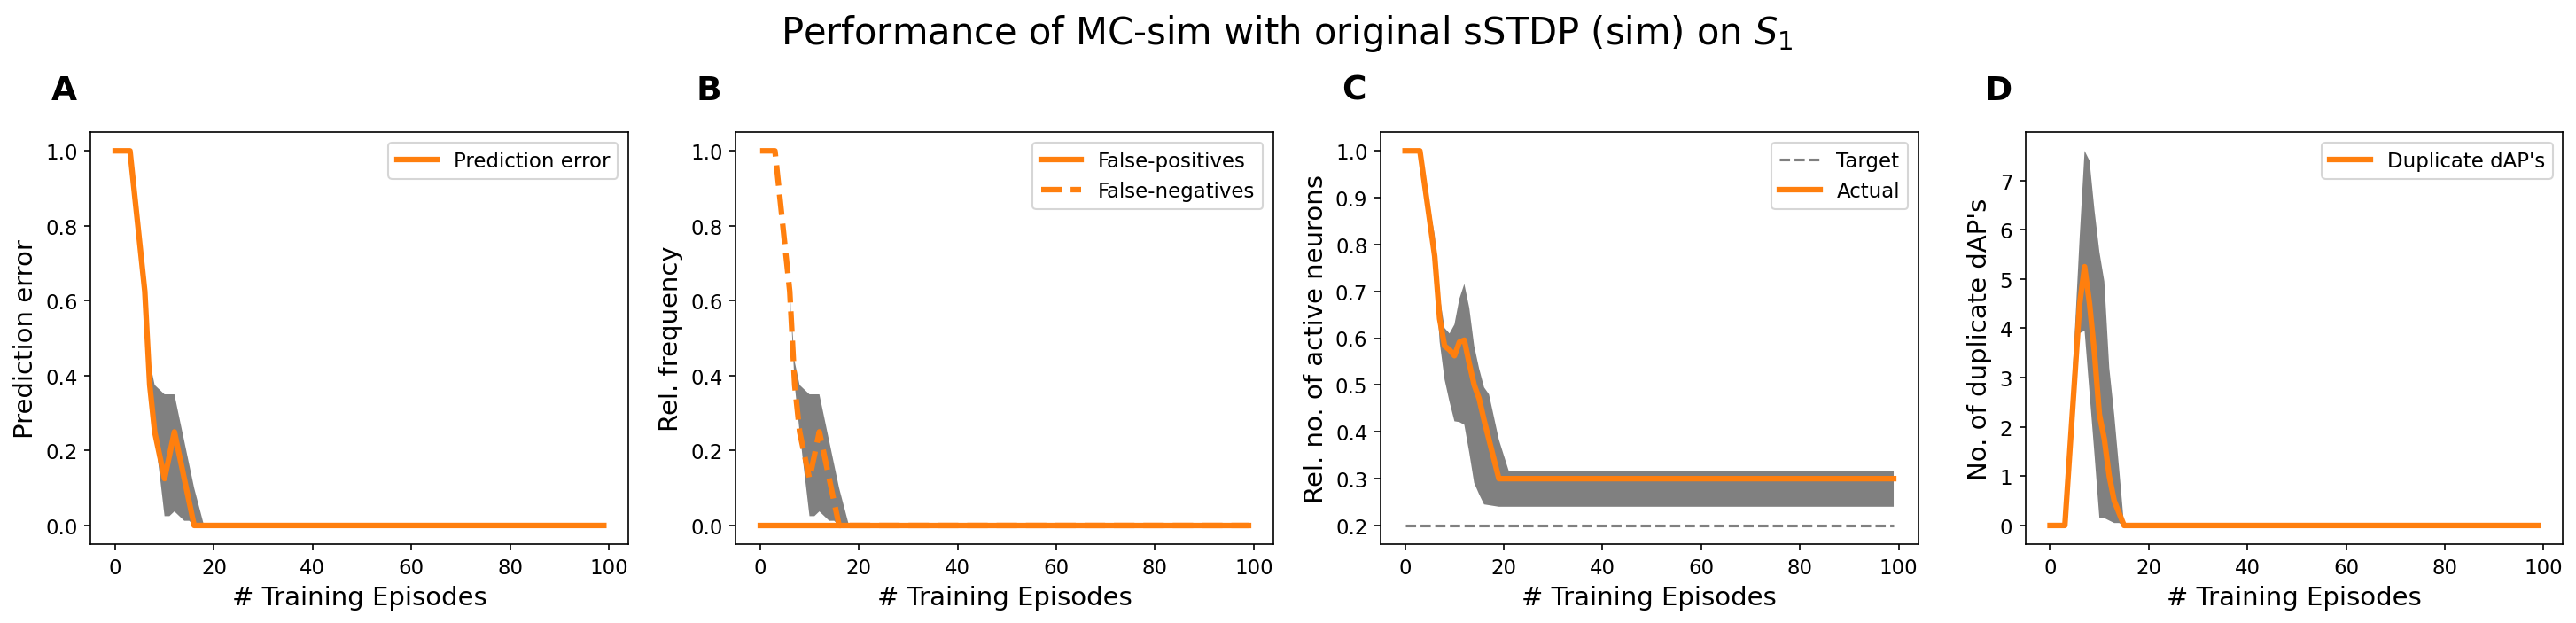

In [5]:
# %matplotlib inline
# RuntimeConfig.backend = Backends.BRAIN_SCALES_2

p = NetworkParameters(network_type=SHTMTotal)
p.load_experiment_params(experiment_type=ExperimentType.EVAL_MULTI, experiment_id=experiment_id, experiment_num=experiment_num)

pf = PerformanceMulti(p, num_instances)
pf.load_data(SHTMTotal, experiment_type=ExperimentType.EVAL_MULTI, experiment_id=experiment_id, experiment_num=experiment_num)

p_plot = PlottingParameters(network_type=SHTMTotal)
p_plot.load_default_params()

# fix for old data which doesn't include DD PF data
for i in range(len(pf.data)):
    if len(pf.data[i][PerformanceMetrics.DD][0]) == 0:
        pf.data[i][PerformanceMetrics.DD] = pf.data[i][PerformanceMetrics.FP]

fig, axs = pf.plot(plt_config=p_plot, statistic=StatisticalMetrics.MEDIAN, 
                   fig_title=u"Performance of MC-sim with original sSTDP (sim) on $S_1$",
                   # fig_title=u"Performance of BSS-2-MC with BSS-2 sSTDP (on-chip), without DIW on $S_1$",
                   # fig_title=u"Performance of BSS-2-MC with BSS-2 sSTDP (on-chip), with DIW on $S_1$",
                   plot_dd=True)

fig_path = join(get_experiment_folder(ExperimentType.EVAL_MULTI, experiment_id, experiment_num, experiment_map="map_name"), "performance.pdf")
fig.savefig(fig_path, dpi=300)

In [5]:
SHTMTotal.__name__

'SHTMTotal'

In [ ]:
RuntimeConfig.subnum_digits = 4

p = NetworkParameters(network_type=SHTMTotal)
p.load_experiment_params(experiment_type=ExperimentType.OPT_GRID, experiment_id="no-calib_on-chip", 
                         experiment_num=3, experiment_subnum=1)
